In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

____

# Objective function definition

In order to implement a simple Bayesian optimization method, we choose a test function to search for its global minimum over a defined interval. The objective function will then be subjected to white noise.

In [3]:
# interval definition
lower = 0
upper = 10

In [4]:
# test function
def f(x):
    return(np.sin(1 + x/2)*0.5+1.5*np.sin(1.5*x) + np.sin(4*x) + np.log(1+x**2))

In [5]:
x = np.linspace(lower, upper, 1000)
y = [f(a) for a in x]

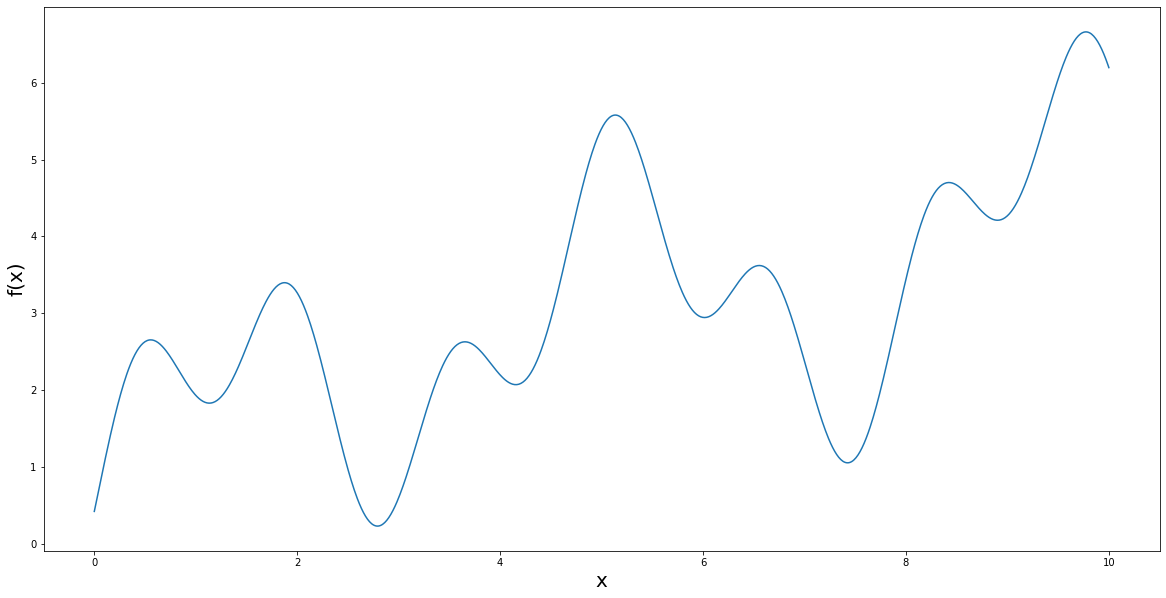

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("x", size=20)
plt.ylabel("f(x)", size=20)
plt.plot(x, y)

In [7]:
# noisy function
def f_obj(x, noise=0.2):
    noise = np.random.normal(loc=0, scale=noise)
    return f(x) + noise

In [8]:
x = np.linspace(lower, upper, 1000)
y = [f_obj(a) for a in x]

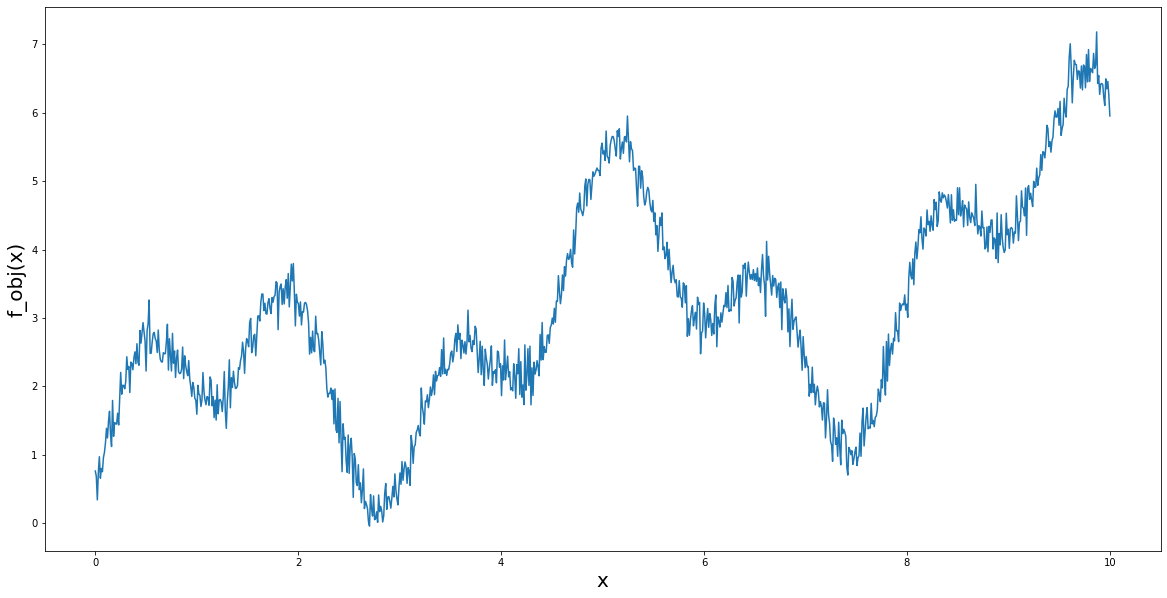

In [9]:
plt.figure(figsize=(20,10))
plt.xlabel("x", size=20)
plt.ylabel("f_obj(x)", size=20)
plt.plot(x, y)

____

# Optimisatoin bayesienne

The only stopping criterion here is the maximum number of iterations (N_max).

In [10]:
# we import the kernels we are going to use
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
# then we import our class coded in order to visualize the behavior of bayesian optimization
from BayesOpt import BayesOptViz

In [11]:
# kernel definition
kernel = Matern(length_scale=0.5, nu=3.5) + WhiteKernel(noise_level=0.5, noise_level_bounds=(1e-10, 0.4))

In [27]:
optimizer = BayesOptViz(f_obj, f, upper, lower, N_max=50, n_init=2, kernel=kernel)

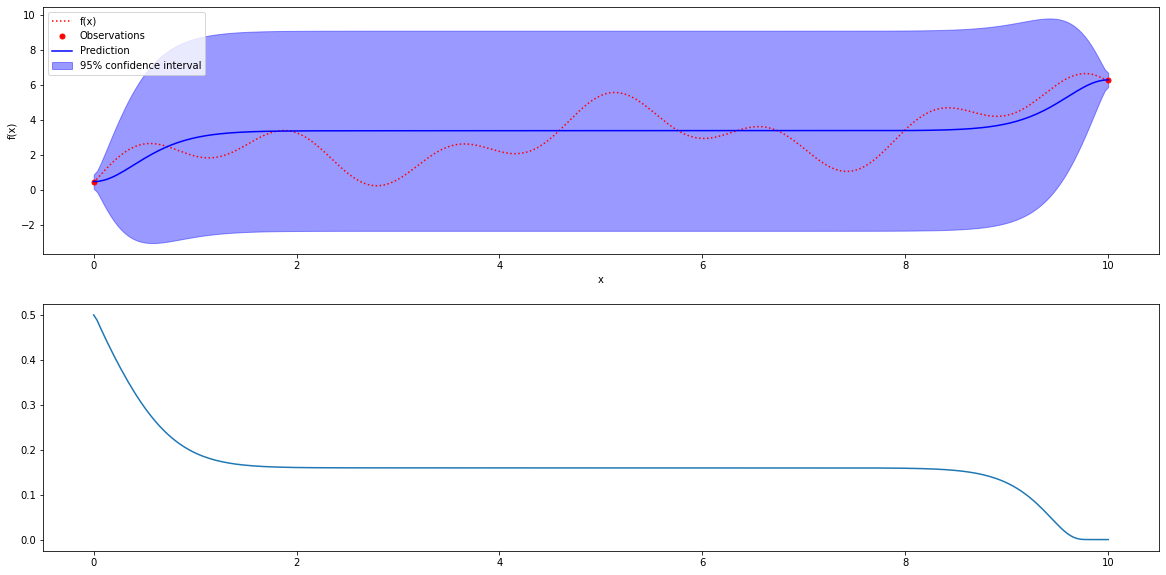

In [28]:
optimizer.n_step(n=0, plot=True) # let's see what we have with only 

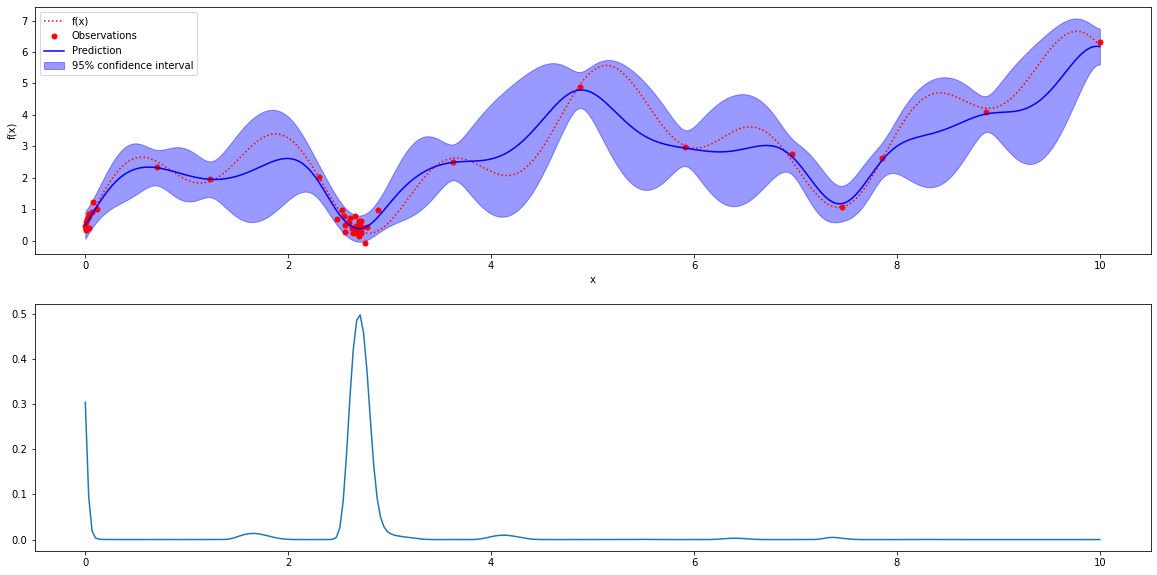

In [29]:
optimizer.complete_run()
optimizer.plot()